In [ ]:

!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-udde1nnt
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-udde1nnt
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8293 sha256=1b781a23f25328dc0cb06a833794ad03d967847f602efbf2fbdcda45f8ed4d9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-pft_ni9a/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [ ]:
!pip install keras-cv tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 10.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# Upload the kaggle.json file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"islamwaheed1","key":"66ee57ffc46c1269ed871b79d5e5b60c"}'}

In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d acharyarupak391/vggfaceweights

 99% 515M/521M [00:10<00:00, 55.4MB/s]
100% 521M/521M [00:10<00:00, 51.0MB/s]


In [ ]:
import zipfile

# Specify the path to the downloaded zip file
zip_file_path = '/content/vggfaceweights.zip'

# Specify the directory where you want to extract the data
extraction_dir = '/content'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

In [ ]:

# Specify the path to the downloaded zip file
zip_file_path = '/content/drive/MyDrive/Persons.zip'

# Specify the directory where you want to extract the data
extraction_dir = '/content'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

In [ ]:

# Specify the path to the downloaded zip file
zip_file_path = '/content/drive/MyDrive/Persons_Test.zip'

# Specify the directory where you want to extract the data
extraction_dir = '/content'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

In [ ]:
Person_names = ["ardogan" , "putin" , "sisi" , "trump" ]

In [ ]:
Person_names

['ardogan', 'putin', 'sisi', 'trump']

In [ ]:

!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2023-09-14 00:27:50--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  --.-KB/s    in 0.1s    

2023-09-14 00:27:50 (4.49 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [ ]:
!bzip2 -dk mmod_human_face_detector.dat.bz2

In [ ]:
import cv2
import os, glob
import matplotlib.pyplot as plt
import dlib

In [ ]:
# Load CNN face detector into dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

RuntimeError: ignored

In [ ]:
path = "/content/Persons"

In [ ]:


# Define the parent directory where all the person folders are located
parent_directory = '/content/Persons/'

# Loop through each person folder
for person_folder in os.listdir(parent_directory):
    person_folder_path = os.path.join(parent_directory, person_folder)

    # Check if the item is a directory
    if os.path.isdir(person_folder_path):
        # Get a list of image file names in the current person's folder
        image_file_names = [f for f in os.listdir(person_folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

        # Loop through each image file in the current person's folder
        for file_name in image_file_names:
            # Construct the full path to the image file
            image_path = os.path.join(person_folder_path, file_name)

            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                    print(f"Error: Unable to read image '{image_path}'")
                    continue
            gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            rects=dnnFaceDetector(gray,1)
            left,top,right,bottom=0,0,0,0
            for (i,rect) in enumerate(rects):
              left=rect.rect.left() #x1
              top=rect.rect.top() #y1
              right=rect.rect.right() #x2
              bottom=rect.rect.bottom() #y2
              width=right-left
              height=bottom-top
              img_crop=img[top:top+height,left:left+width]
              if width > 0 and height > 0:
                    img_crop = img[top:top + height, left:left + width]

                    if img_crop is not None and not img_crop.size == 0:

                          output_path = os.path.join(person_folder_path, f'face_{i}_{file_name}')
                          image_path = os.path.join(person_folder_path, file_name)
                          cv2.imwrite(image_path,img_crop)
                          # Display the image with the detected face
                      # Convert BGR to RGB
                    # plt.imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
                    # plt.axis('off')  # Turn off the axis labels
                    # plt.show()

              else:
                    print(f"No face detected in image '{image_path}'")

            # Perform face detection and cropping as needed
            # (Add your face detection and cropping code here)

            # Define the output path for the cropped face image
            # output_path = os.path.join(person_folder_path, 'Images_crop', file_name)
            # img_path=path+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]


            # Save the cropped face image (modify this part based on your face cropping logic)
            # cv2.imwrite(output_path, cropped_face)


In [ ]:


# Define the parent directory where all the person folders are located
parent_directory = '/content/Persons_Test/'

# Loop through each person folder
for person_folder in os.listdir(parent_directory):
    person_folder_path = os.path.join(parent_directory, person_folder)

    # Check if the item is a directory
    if os.path.isdir(person_folder_path):
        # Get a list of image file names in the current person's folder
        image_file_names = [f for f in os.listdir(person_folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

        # Loop through each image file in the current person's folder
        for file_name in image_file_names:
            # Construct the full path to the image file
            image_path = os.path.join(person_folder_path, file_name)

            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                    print(f"Error: Unable to read image '{image_path}'")
                    continue
            gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            rects=dnnFaceDetector(gray,1)
            left,top,right,bottom=0,0,0,0
            for (i,rect) in enumerate(rects):
              left=rect.rect.left() #x1
              top=rect.rect.top() #y1
              right=rect.rect.right() #x2
              bottom=rect.rect.bottom() #y2
              width=right-left
              height=bottom-top
              img_crop=img[top:top+height,left:left+width]
              if width > 0 and height > 0:
                    img_crop = img[top:top + height, left:left + width]

                    if img_crop is not None and not img_crop.size == 0:

                          output_path = os.path.join(person_folder_path, f'face_{i}_{file_name}')
                          image_path = os.path.join(person_folder_path, file_name)
                          cv2.imwrite(image_path,img_crop)
                          # Display the image with the detected face
                      # Convert BGR to RGB
                    # plt.imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
                    # plt.axis('off')  # Turn off the axis labels
                    # plt.show()

              else:
                    print(f"No face detected in image '{image_path}'")

            # Perform face detection and cropping as needed
            # (Add your face detection and cropping code here)

            # Define the output path for the cropped face image
            # output_path = os.path.join(person_folder_path, 'Images_crop', file_name)
            # img_path=path+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]


            # Save the cropped face image (modify this part based on your face cropping logic)
            # cv2.imwrite(output_path, cropped_face)


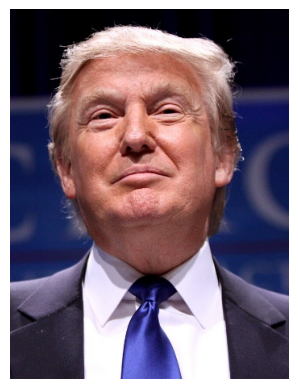

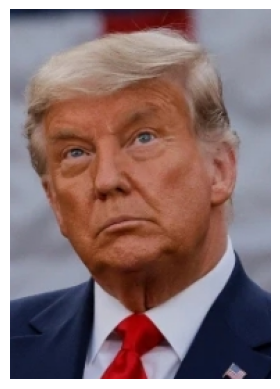

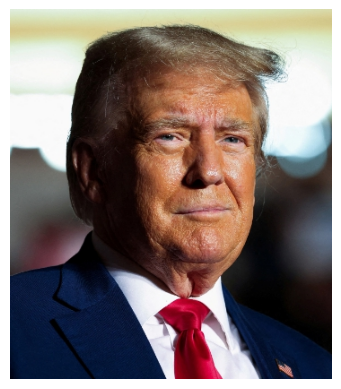

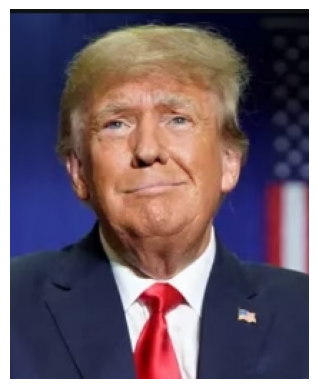

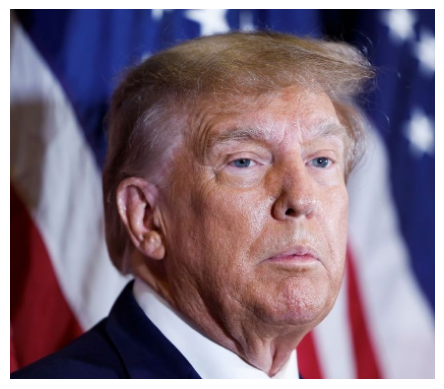

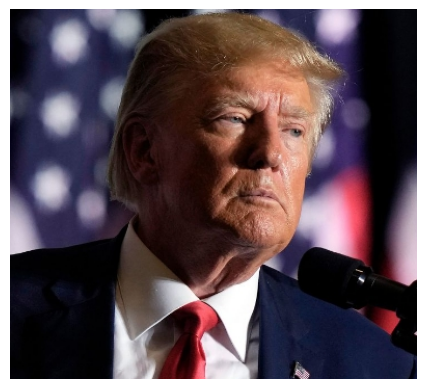

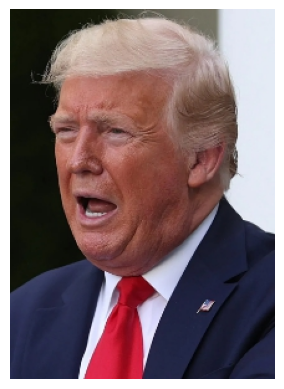

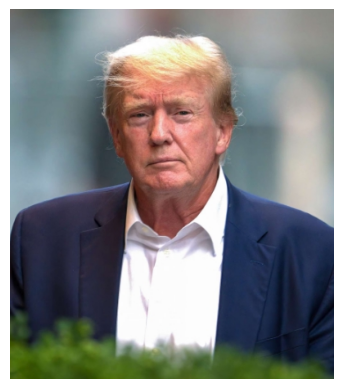

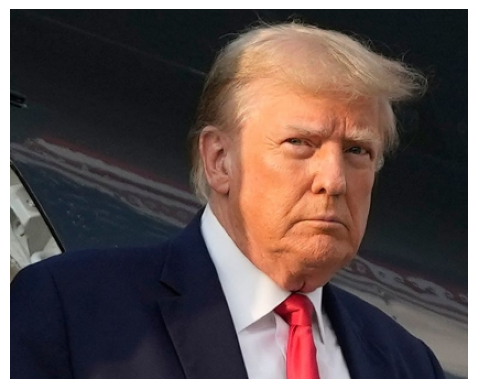

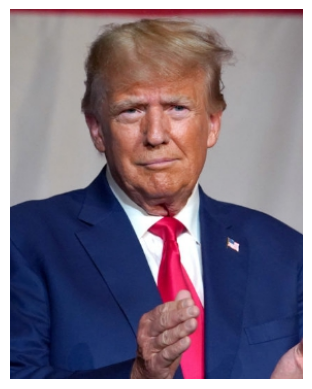

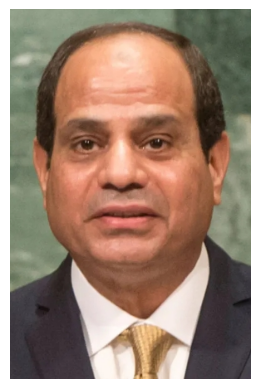

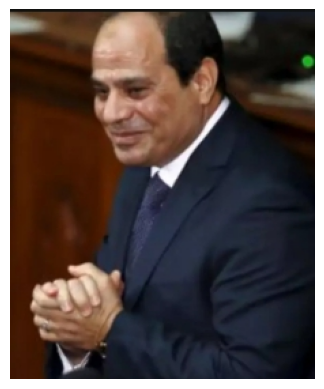

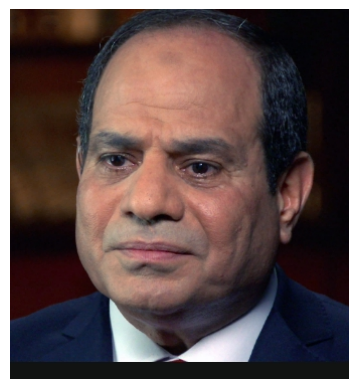

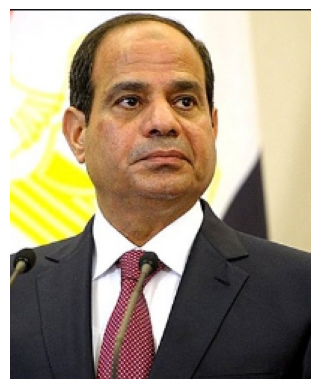

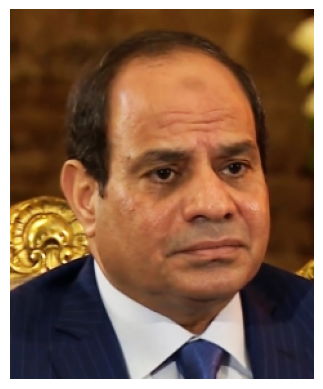

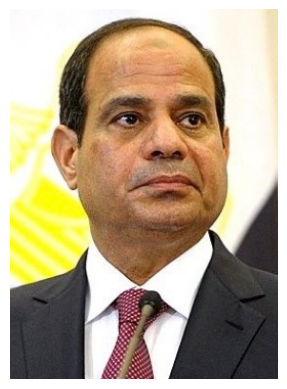

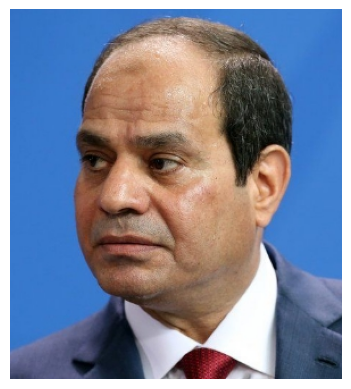

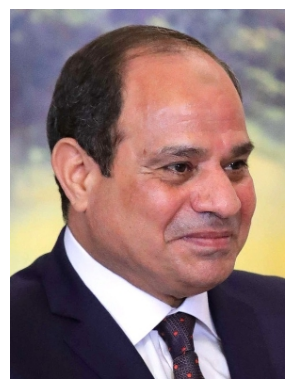

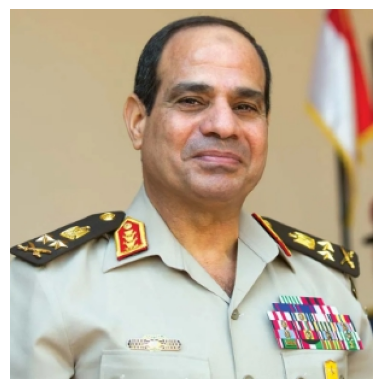

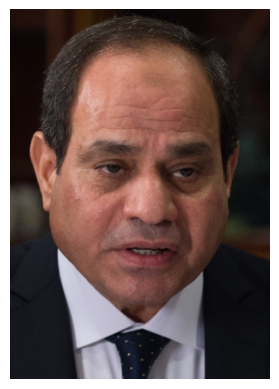

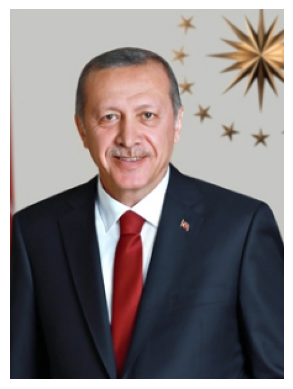

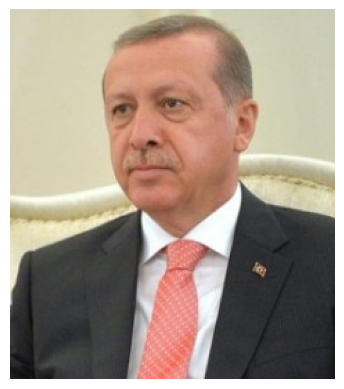

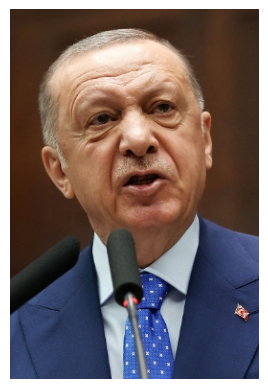

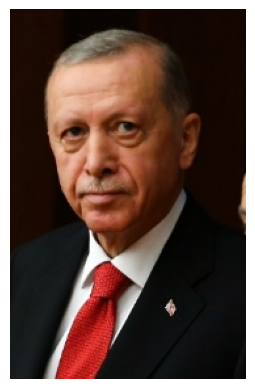

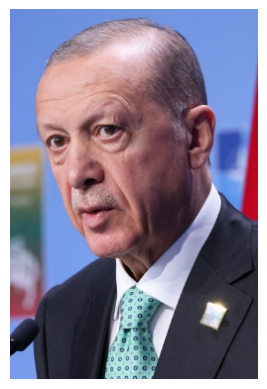

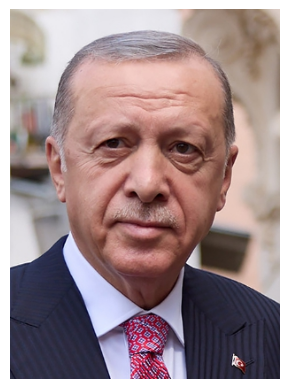

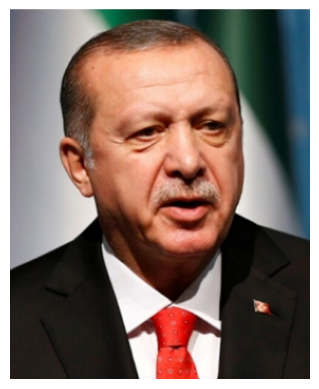

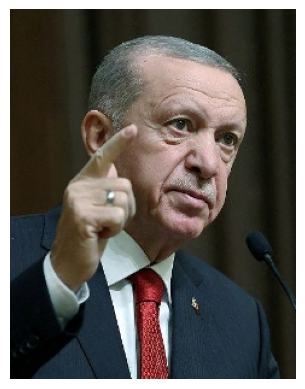

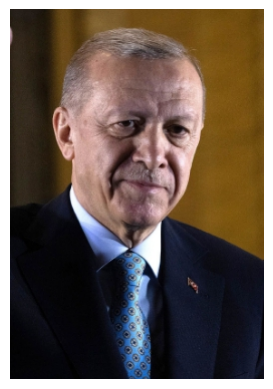

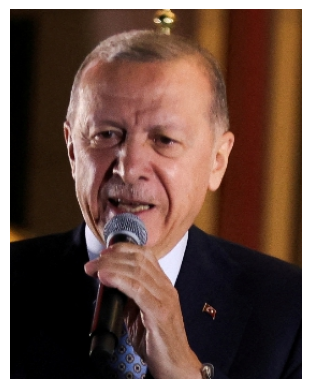

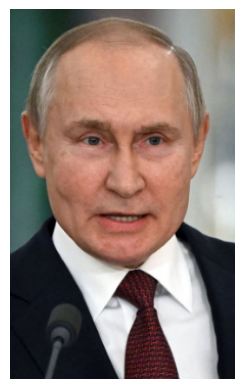

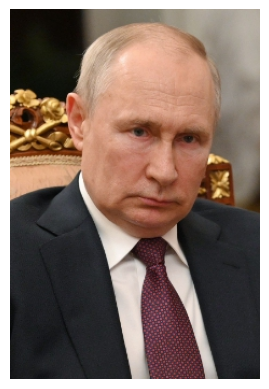

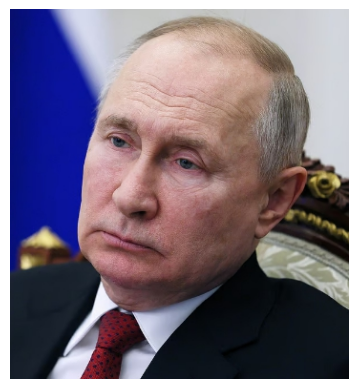

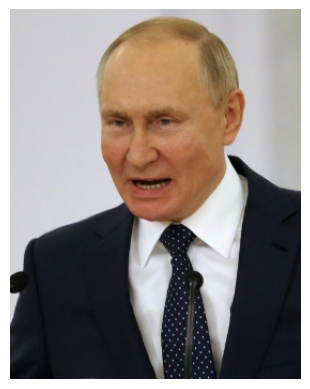

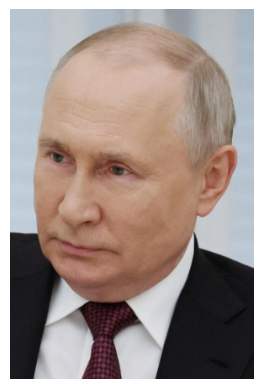

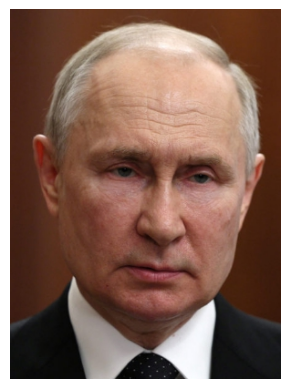

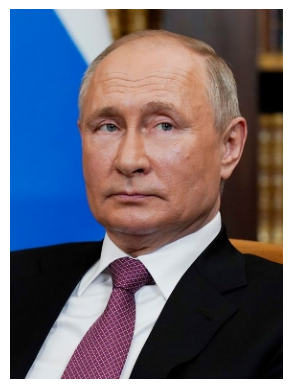

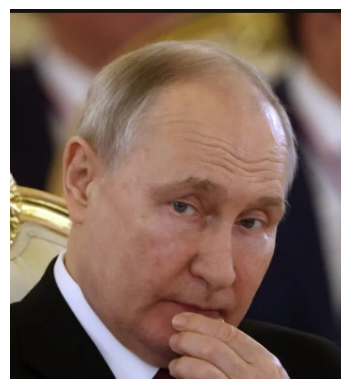

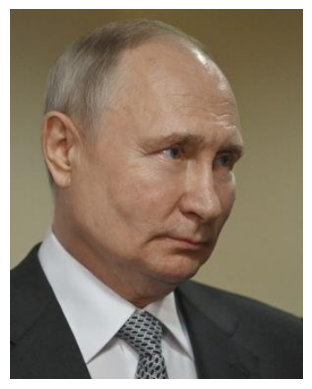

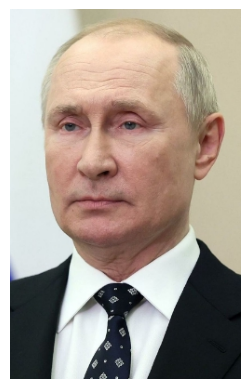

In [ ]:
import os
import cv2

# Define the parent directory where all the person folders are located
parent_directory = '/content/Persons/'

# Loop through each person folder
for person_folder in os.listdir(parent_directory):
    person_folder_path = os.path.join(parent_directory, person_folder)

    # Check if the item is a directory
    if os.path.isdir(person_folder_path):
        # Get a list of image file names in the current person's folder
        image_file_names = [f for f in os.listdir(person_folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

        # Loop through each image file in the current person's folder
        for file_name in image_file_names:

              image_path = os.path.join(person_folder_path, file_name)
              img = cv2.imread(image_path)
              plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   # Convert BGR to RGB
              plt.axis('off')  # Turn off the axis labels
              plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
x = model.load_weights('/content/vgg_face_weights.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                        

In [ ]:
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [ ]:
#Prepare Training Data
path = '/content/Persons/'
x_train=[]
y_train=[]
person_folders=os.listdir(path)
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir(path+person+'/')
  for image_name in image_names:
    img=load_img(path+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [ ]:
person_rep

{0: 'trump', 1: 'sisi', 2: 'ardogan', 3: 'putin'}

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
#Prepare Test Data
path = '/content/Persons_Test/'
x_test=[]
y_test=[]
person_folders=os.listdir(path)
for i,person in enumerate(person_folders):
  image_names=os.listdir(path+person+'/')
  for image_name in image_names:
    img=load_img(path+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [ ]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [ ]:
# Softmax regressor to classify images based on encoding
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [ ]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
2/2 [==============================] - 3s 299ms/step - loss: 2.0009 - accuracy: 0.2500 - val_loss: 1.2029 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 56ms/step - loss: 0.7704 - accuracy: 0.7750 - val_loss: 1.2681 - val_accuracy: 0.5833
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 0.6637 - accuracy: 0.8750 - val_loss: 1.0484 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 0.4786 - accuracy: 0.9500 - val_loss: 0.9676 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 43ms/step - loss: 0.4933 - accuracy: 0.9500 - val_loss: 0.8668 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 0.4675 - accuracy: 1.0000 - val_loss: 0.8693 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 48ms/step - loss: 0.4942 - accuracy: 0.9250 - val_loss: 0.9595 - val_accuracy: 0.6667
Epoch 8/100
2/2 [==

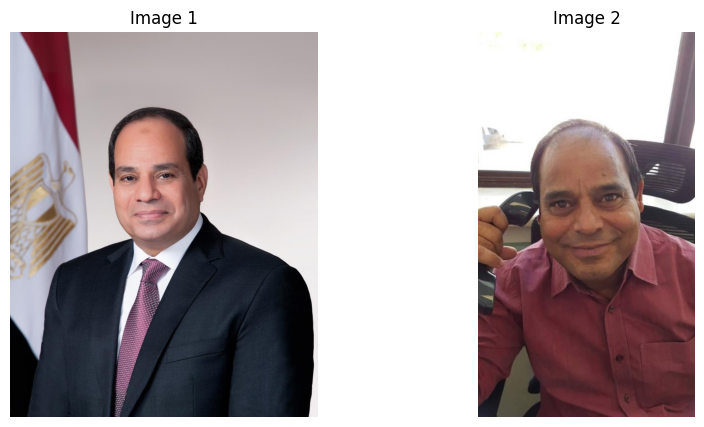

Faces do not match with a similarity score of 0.7479307055473328


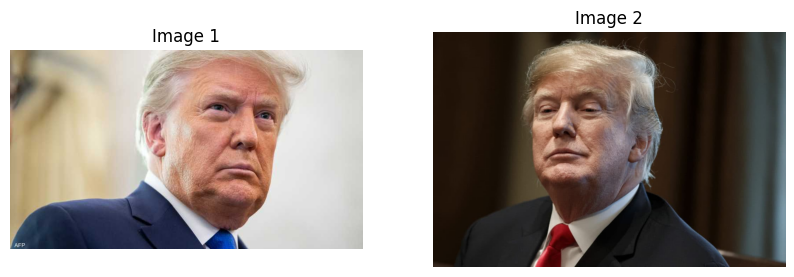

Faces match with a similarity score of 0.8661317825317383


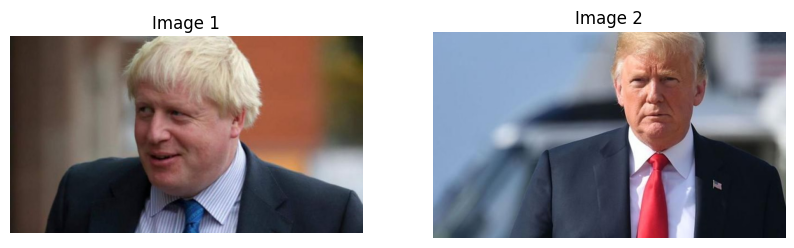

Faces do not match with a similarity score of 0.4358615577220917


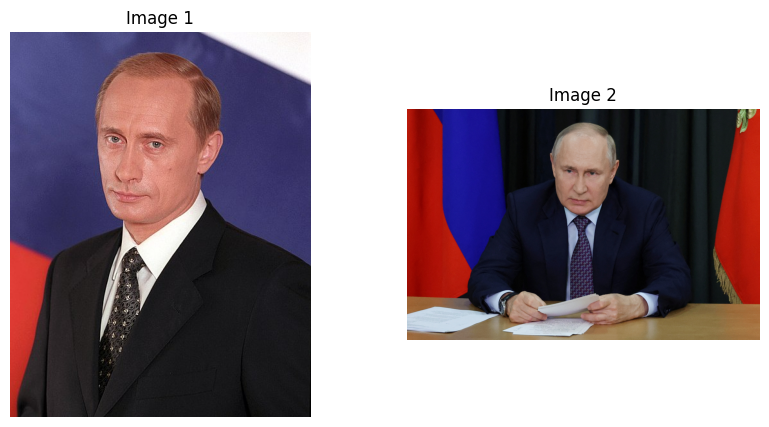

Faces do not match with a similarity score of 0.6818375587463379


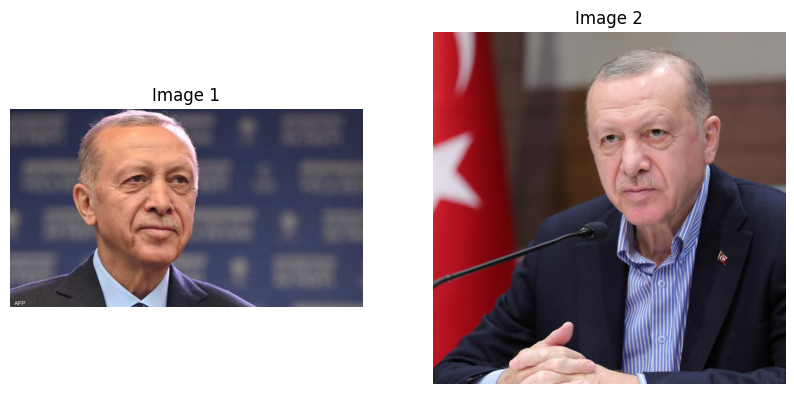

Faces match with a similarity score of 0.7906081080436707


In [ ]:
# Function to extract features from an image

from scipy.spatial.distance import cosine


def extract_features(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    # img=load_img(path+person+'/'+image_name,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)  # Preprocess the input according to the VGGFace model
    features = vgg_face(img)[0]
    return features

# Function to calculate the cosine similarity between two feature vectors
def cosine_similarity(features1, features2):
    return 1 - cosine(features1, features2)

# Load and preprocess the two input images

image_directory = '/content/drive/MyDrive/samples'

# Get a list of image files in the directory
# image_files = [f for f in os.listdir(image_directory) if f.endswith('.jpg')]

max_image_number = len(os.listdir(image_directory))

# Loop through the images in pairs
for i in range(0, max_image_number, 2):
    # Check if there's an even number of images left
    if i + 1 < max_image_number:
        # Load and display the current pair of images
        image1_path = os.path.join(image_directory, f"{i}.jpg")
        image2_path = os.path.join(image_directory, f"{i + 1}.jpg")

        image1 = extract_features(image1_path, model)
        image2 = extract_features(image2_path, model)

        # Display the images here or perform any desired operations

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(load_img(image1_path))
        plt.title('Image 1')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(load_img(image2_path))
        plt.title('Image 2')
        plt.axis('off')

        plt.show()


        similarity_score = cosine_similarity(image1, image2)

        threshold = 0.75  # Adjust this threshold as needed

        if similarity_score >= threshold:
            print("Faces match with a similarity score of", similarity_score)
        else:
            print("Faces do not match with a similarity score of", similarity_score)